<a href="https://colab.research.google.com/github/prasad209/hello-world/blob/main/Logistic_Regression_PK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#looking for ull values
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print("dataset size :")
print("rows {} columns {}".format(dataset.shape[0],dataset.shape[1]))

dataset size :
rows 7043 columns 21


In [ ]:
pd.DataFrame(dataset.dtypes)

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
pd.DataFrame(dataset.dtypes).rename(columns={0:'dtype'})

,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


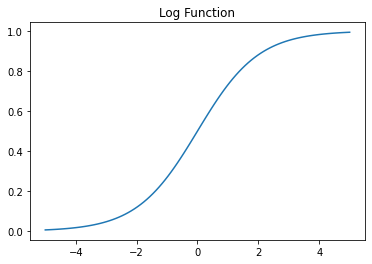

In [ ]:
x_values=np.linspace(-5,5,100)
y_values=[1/(1+np.exp(-x)) for x in x_values]
plt.plot(x_values,y_values)
plt.title("Log Function")
plt.show()

In [ ]:
df=dataset.copy()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


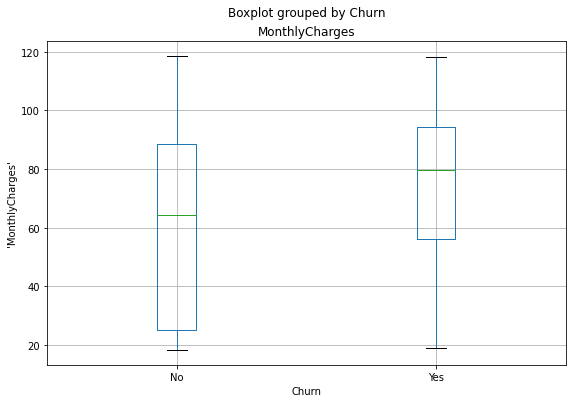

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
df.boxplot(column='MonthlyCharges', by="Churn",ax=ax)
ax.set_ylabel("'MonthlyCharges'")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


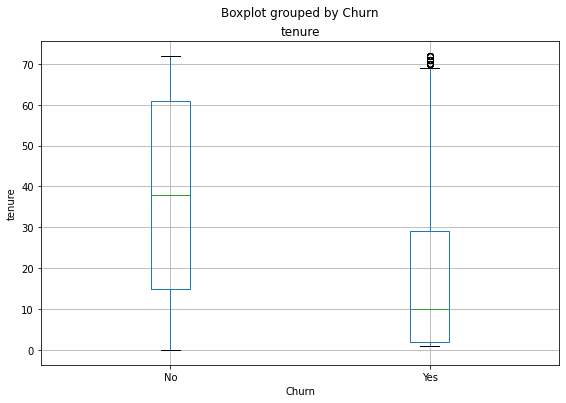

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
df.boxplot(column='tenure', by="Churn",ax=ax)
ax.set_ylabel("tenure")
plt.show()

In [ ]:
df["Churn"].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
df["class"]=df["Churn"].apply(lambda x: 1 if x=="Yes" else 0 )
#we just converted yes , no to numbers i.e 1 and 0
#Now lets create X and y
X=df[["MonthlyCharges","tenure"]].copy()
y=df["Churn"].copy()

In [ ]:
X.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [ ]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
#first split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
y_train.value_counts()

No     4133
Yes    1501
Name: Churn, dtype: int64

In [ ]:
#fit_intercept=False sets the y-intercept to 0. If fit_intercept=True , 
#the y-intercept will be determined by the line of best fit.

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,fit_intercept=True,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
model.coef_

array([[ 0.03315385, -0.05646728]])

In [ ]:
model.intercept_

array([-1.77408975])

In [ ]:
train_preds=model.predict_proba(X_train)
test_preds=model.predict_proba(X_test)

In [ ]:
train_preds

array([[0.95339588, 0.04660412],
       [0.73651841, 0.26348159],
       [0.99306604, 0.00693396],
       ...,
       [0.9873984 , 0.0126016 ],
       [0.38179791, 0.61820209],
       [0.7897834 , 0.2102166 ]])

In [ ]:
#[:,1]------[layer:row:column]
#[:,1]------all layers, all rows and first column----3d slicing
train_preds = model.predict_proba(X_train)[:,1]
test_preds = model.predict_proba(X_test)[:,1]

In [ ]:
train_preds

array([0.04660412, 0.26348159, 0.00693396, ..., 0.0126016 , 0.61820209,
       0.2102166 ])

In [ ]:
train_class_preds=model.predict(X_train)
test_class_preds=model.predict(X_test)

In [ ]:
train_class_preds

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns


In [ ]:
train_accuracy=accuracy_score(train_class_preds,y_train)
test_accuracy=accuracy_score(test_class_preds,y_test)

In [ ]:
train_accuracy

0.7857649982250621

In [ ]:
test_accuracy

0.7735982966643009

In [ ]:
cm=confusion_matrix(y_train,train_class_preds)
print(cm)


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

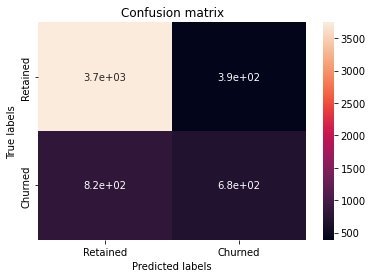

In [ ]:
labels = ['Retained', 'Churned']
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

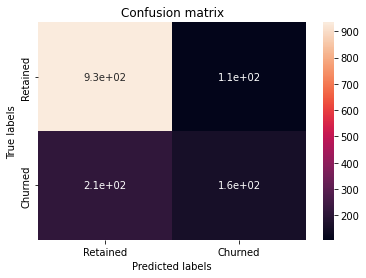

In [ ]:
labels = ['Retained', 'Churned']
cm=confusion_matrix(y_test,test_class_preds)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic=LogisticRegression()

In [ ]:
scoring=["accuracy"]

In [ ]:
scoring

['accuracy']

In [ ]:
scores=cross_validate(logistic,X_train,y_train,scoring=scoring,cv=5,return_train_score=True,return_estimator=True,verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [ ]:
scores["train_accuracy"]

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [ ]:
scores["test_accuracy"]

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for i in scores['estimator']:
  print(i.coef_)

[[ 0.03293792 -0.05617762]]
[[ 0.03215852 -0.05562275]]
[[ 0.03454813 -0.05820295]]
[[ 0.03362381 -0.05711808]]
[[ 0.03257423 -0.05530045]]
